In [87]:
import pandas as pd
import numpy as np
import plotly.express as px

In [88]:
cc = pd.read_csv('https://www2.ed.gov/programs/osepidea/618-data/state-level-data-files/part-b-data/child-count-and-educational-environments/bchildcountandedenvironments2018-19.csv', skiprows=3, header=1, skipfooter=5)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.



In [89]:
cc

,Year,State Name,SEA Education Environment,SEA Disability Category,Age 3,Age 4,Age 5,American Indian or Alaska Native Age 3 to 5,Asian Age 3-5,Black or African American Age 3-5,...,EL No Age 6 to 21,Female Age 6 to 21,Male Age 6 to 21,American Indian or Alaska Native Age 6 to21,Asian Age 6 to21,Black or African American Age 6 to21,Hispanic/Latino Age 6 to21,Native Hawaiian or Other Pacific Islander Age 6 to21,Two or more races Age 6 to21,White Age 6 to21
0,2018,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,-,-,...,52,1,51,0,0,43,0,0,0,9
1,2018,Alabama,Home,All Disabilities,39,38,27,1,0,10,...,-,-,-,-,-,-,-,-,-,-
2,2018,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,-,-,...,284,107,183,3,6,91,15,0,1,174
3,2018,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,-,-,...,5114,1770,3615,28,54,1962,374,5,136,2826
4,2018,Alabama,Inside regular class 80% or more of the day,All Disabilities,-,-,-,-,-,-,...,68599,24075,47344,662,404,26004,4571,55,1550,38173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16221,2018,"US, Outlying Areas, and Freely Associated States",Services in Other Location than Regular Early ...,Visual impairment,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
16222,2018,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
16223,2018,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
16224,2018,"US, Outlying Areas, and Freely Associated States","Total, Age 3-5",Visual impairment,-,-,-,30,126,283,...,-,-,-,-,-,-,-,-,-,-


In [90]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16226 entries, 0 to 16225
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Year                                                  16226 non-null  int64 
 1   State Name                                            16226 non-null  object
 2   SEA Education Environment                             16226 non-null  object
 3   SEA Disability Category                               16226 non-null  object
 4   Age 3                                                 16226 non-null  object
 5   Age 4                                                 16226 non-null  object
 6   Age 5                                                 16226 non-null  object
 7   American Indian or Alaska Native Age 3 to 5           16226 non-null  object
 8   Asian Age 3-5                                         16226 non-nu

In [91]:
cc = cc.replace('-', np.nan)
cc = cc.replace('*', np.nan)

cc = cc.replace('-', np.nan)

In [92]:
cc['SEA Education Environment'].unique()

array(['Correctional Facilities', 'Home', 'Homebound/Hospital',
       'Inside regular class 40% through 79% of the day',
       'Inside regular class 80% or more of the day',
       'Inside regular class less than 40% of the day',
       'Parentally Placed in Private Schools',
       'Residential Facility, Age 3-5', 'Residential Facility, Age 6-21',
       'Separate Class', 'Separate School, Age 3-5',
       'Separate School, Age 6-21', 'Service Provider Location',
       'Services in Other Location than Regular Early Childhood Program (attend at least 10 hours)',
       'Services in Other Location than Regular Early Childhood Program (attend less than 10 hours)',
       'Services in Regular Early Childhood Program (attend at least 10 hours)',
       'Services in Regular Early Childhood Program (attend less than 10 hours)',
       'Total, Age 3-5', 'Total, Age 6-21'], dtype=object)

In [93]:
cc['SEA Disability Category'].unique()

array(['All Disabilities', 'Autism', 'Deaf-blindness',
       'Developmental delay', 'Emotional disturbance',
       'Hearing impairment', 'Intellectual disability',
       'Multiple disabilities', 'Orthopedic impairment',
       'Other health impairment', 'Specific learning disability',
       'Speech or language impairment', 'Traumatic brain injury',
       'Visual impairment'], dtype=object)

In [94]:
states =  {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


In [95]:
tot6_21 = cc.loc[cc['SEA Education Environment']  == 'Total, Age 6-21']
tot6_21.columns

Index(['Year', 'State Name', 'SEA Education Environment',
       'SEA Disability Category', 'Age 3', 'Age 4', 'Age 5',
       'American Indian or Alaska Native Age 3 to 5 ', 'Asian Age 3-5 ',
       'Black or African American Age 3-5 ', 'Hispanic/Latino Age 3-5 ',
       'Native Hawaiian or Other Pacific Islander Age 3-5 ',
       'Two or More Races Age 3-5 ', 'White Age 3-5 ', 'Female Age 3 to 5',
       'Male Age 3 to 5', 'EL Yes Age 3 to 5', 'EL No Age 3 to 5',
       'Age 3 to 5', 'Age 6', 'Age 7', 'Age 8', 'Age 9', 'Age 10', 'Age 11',
       'Age 12', 'Age 13', 'Age 14', 'Age 15', 'Age 16', 'Age 17', 'Age 18',
       'Age 19', 'Age 20', 'Age 21', 'Age 6-11', 'Age 12-17', 'Age 18-21',
       'Ages 6-21', 'EL Yes Age 6 to 21', 'EL No Age 6 to 21',
       'Female Age 6 to 21', 'Male Age 6 to 21',
       'American Indian or Alaska Native Age 6 to21', 'Asian Age 6 to21',
       'Black or African American Age 6 to21', 'Hispanic/Latino Age 6 to21',
       'Native Hawaiian or Other Pacifi

In [96]:
tot6_21 = tot6_21.replace({'State Name': states})

In [97]:
import plotly.offline as pyo
import plotly.graph_objs as go

In [98]:
tot6_21_ALL = tot6_21[tot6_21['SEA Disability Category'] == "All Disabilities"]
tot6_21_ALL = tot6_21_ALL.replace(np.nan, 0)
tot6_21_ALL

,Year,State Name,SEA Education Environment,SEA Disability Category,Age 3,Age 4,Age 5,American Indian or Alaska Native Age 3 to 5,Asian Age 3-5,Black or African American Age 3-5,...,EL No Age 6 to 21,Female Age 6 to 21,Male Age 6 to 21,American Indian or Alaska Native Age 6 to21,Asian Age 6 to21,Black or African American Age 6 to21,Hispanic/Latino Age 6 to21,Native Hawaiian or Other Pacific Islander Age 6 to21,Two or more races Age 6 to21,White Age 6 to21
18,2018,AL,"Total, Age 6-21",All Disabilities,0,0,0,0,0,0,...,82012,28669,56767,731,562,31528,5496,66,1833,45220
284,2018,AK,"Total, Age 6-21",All Disabilities,0,0,0,0,0,0,...,14596,5820,11182,4742,610,535,1193,447,2278,7197
550,2018,AS,"Total, Age 6-21",All Disabilities,0,0,0,0,0,0,...,0,145,360,0,x,0,0,500,x,x
816,2018,AZ,"Total, Age 6-21",All Disabilities,0,0,0,0,0,0,...,117473,43488,84578,7719,1602,8534,58095,366,4155,47595
1082,2018,AR,"Total, Age 6-21",All Disabilities,0,0,0,0,0,0,...,55627,21079,40287,411,472,14129,7130,351,1659,37214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14914,2018,WA,"Total, Age 6-21",All Disabilities,0,0,0,0,0,0,...,109765,44097,86385,2548,4972,7438,33629,1161,10966,69774
15180,2018,WV,"Total, Age 6-21",All Disabilities,0,0,0,0,0,0,...,41666,14714,27224,41,95,1918,694,10,1338,37842
15446,2018,WI,"Total, Age 6-21",All Disabilities,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15712,2018,WY,"Total, Age 6-21",All Disabilities,0,0,0,0,0,0,...,11803,4319,8029,593,77,146,1677,23,582,9250


In [99]:
tot6_21_ALL['Ages 6-21'].unique()
tot6_21_ALL['Ages 6-21'] = tot6_21_ALL['Ages 6-21'].astype('int')

In [100]:
tot6_21_ALL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 18 to 15978
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Year                                                  61 non-null     int64 
 1   State Name                                            61 non-null     object
 2   SEA Education Environment                             61 non-null     object
 3   SEA Disability Category                               61 non-null     object
 4   Age 3                                                 61 non-null     int64 
 5   Age 4                                                 61 non-null     int64 
 6   Age 5                                                 61 non-null     int64 
 7   American Indian or Alaska Native Age 3 to 5           61 non-null     int64 
 8   Asian Age 3-5                                         61 non-null   

In [104]:
tot6_21_ALL.describe()

,Year,Age 3,Age 4,Age 5,American Indian or Alaska Native Age 3 to 5,Asian Age 3-5,Black or African American Age 3-5,Hispanic/Latino Age 3-5,Native Hawaiian or Other Pacific Islander Age 3-5,Two or More Races Age 3-5,White Age 3-5,Female Age 3 to 5,Male Age 3 to 5,EL Yes Age 3 to 5,EL No Age 3 to 5,Age 3 to 5,Ages 6-21
count,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,6.100000e+01
mean,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.070567e+05
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.057965e+05
min,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
25%,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.765800e+04
50%,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.255100e+04
75%,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.304880e+05
max,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.315228e+06


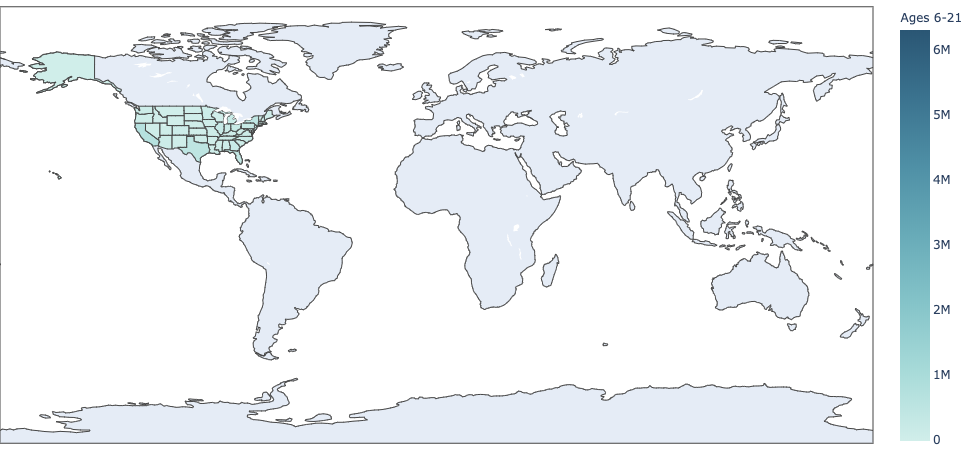

In [106]:
fig = px.choropleth(tot6_21_ALL, locations='State Name', locationmode ='USA-states', color='Ages 6-21',
                     color_continuous_scale='Teal')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()